In [2]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "IA-2024-1/eje" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/IA-2024-1/eje


In [3]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__

'2.0.3'

In [4]:
df = pd.read_csv('Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20240312 (2).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914849 entries, 0 to 5914848
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CodigoEstacion     int64  
 1   CodigoSensor       int64  
 2   FechaObservacion   object 
 3   ValorObservado     float64
 4   NombreEstacion     object 
 5   Departamento       object 
 6   Municipio          object 
 7   ZonaHidrografica   object 
 8   Latitud            float64
 9   Longitud           float64
 10  DescripcionSensor  object 
 11  UnidadMedida       object 
dtypes: float64(3), int64(2), object(7)
memory usage: 541.5+ MB


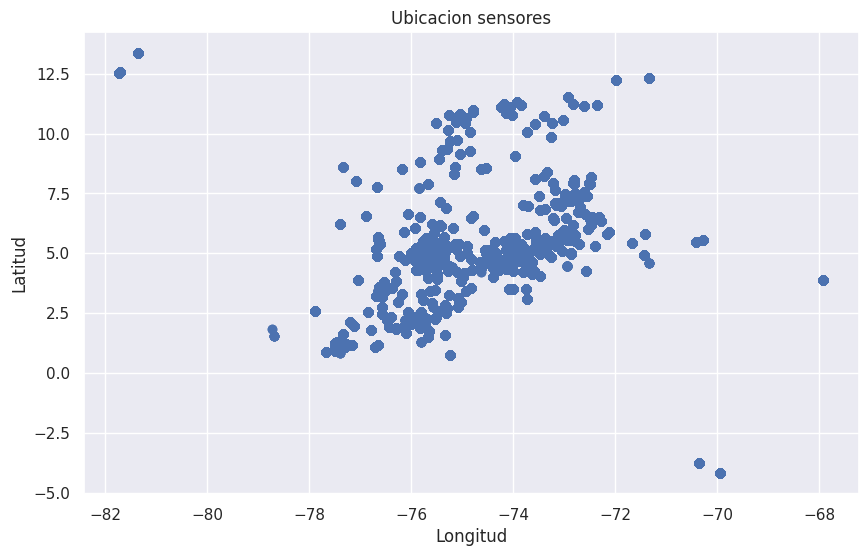

In [5]:
#@title **Ubicacion sensores**
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitud'], df['Latitud'])
plt.title('Ubicacion sensores')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)


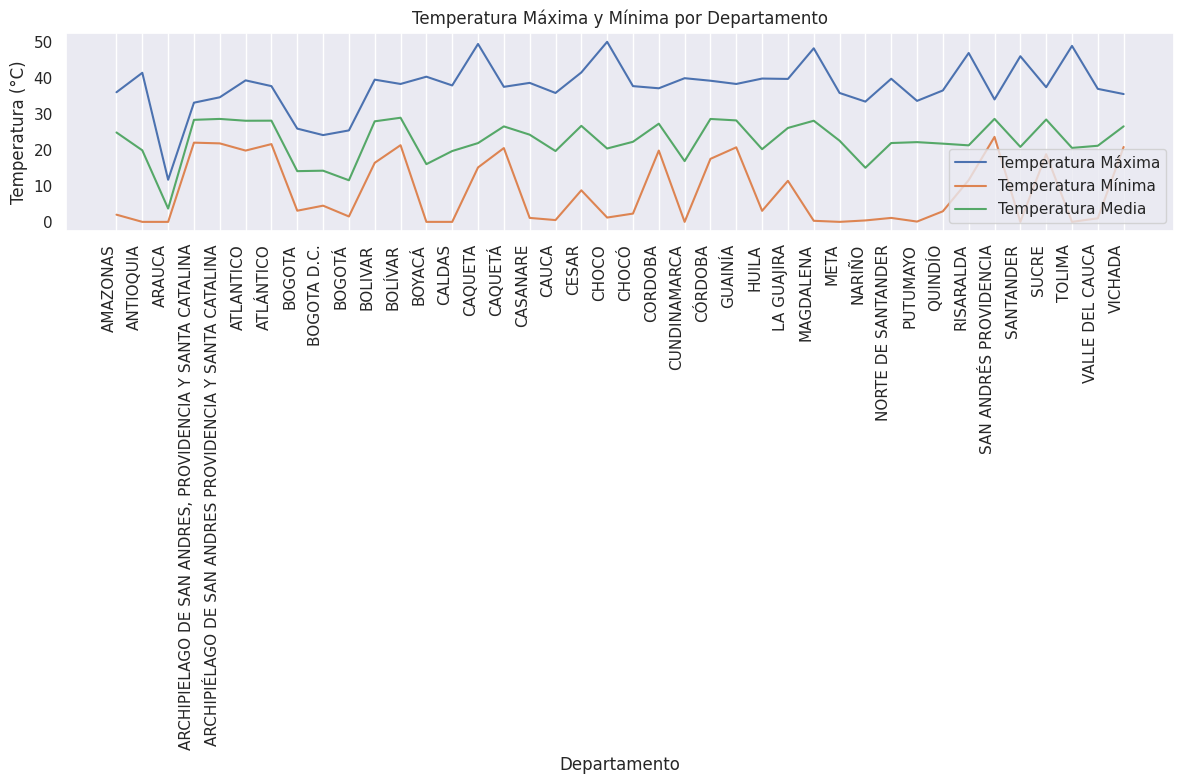

In [6]:
#@title **Grafica Máxima,Mínima,Media**
temperaturas_dept = df.groupby('Departamento').agg({'ValorObservado': ['max', 'min' , 'mean']}).reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
index = range(len(temperaturas_dept))
bar_width = 0.35


plt.plot(index, temperaturas_dept['ValorObservado']['max'], label='Temperatura Máxima')
plt.plot(index, temperaturas_dept['ValorObservado']['min'], label='Temperatura Mínima')
plt.plot(index, temperaturas_dept['ValorObservado']['mean'], label='Temperatura Media')


plt.xlabel('Departamento')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Máxima y Mínima por Departamento')
plt.xticks(index, temperaturas_dept['Departamento'], rotation=90, ha='right')
plt.legend()
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

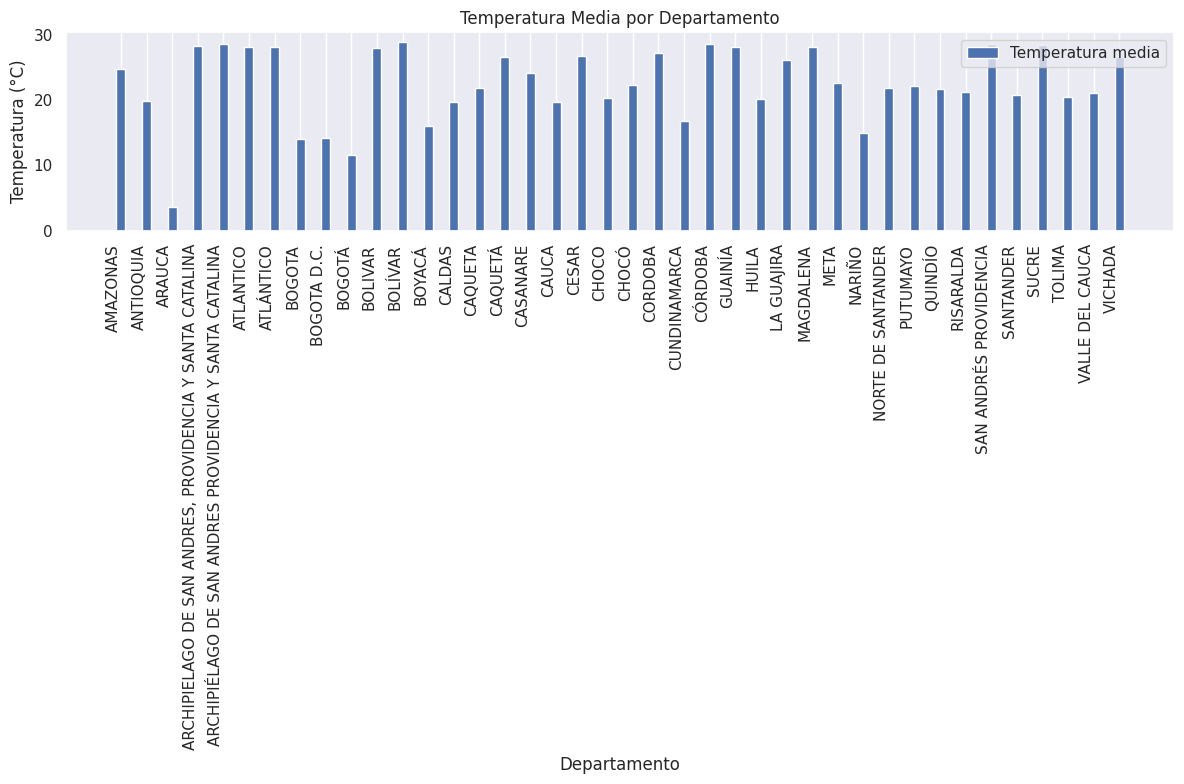

In [7]:
#@title **Grafica Temperatura Media**
temperaturas_dept = df.groupby('Departamento').agg({'ValorObservado': ['max', 'min' , 'mean']}).reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
index = range(len(temperaturas_dept))
bar_width = 0.35


plt.bar(index, temperaturas_dept['ValorObservado']['mean'], bar_width, label='Temperatura media')

plt.xlabel('Departamento')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Media por Departamento')
plt.xticks(index, temperaturas_dept['Departamento'], rotation=90, ha='right')
plt.legend()
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<ipython-input-8-da245c1526be>:13: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], infer_datetime_format=True, errors='coerce')
<ipython-input-8-da245c1526be>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], infer_datetime_format=True, errors='coerce')


Error Cuadrático Medio (MSE): 0.4253370422123171
Coeficiente de Determinación (R^2): 0.9879873128595448


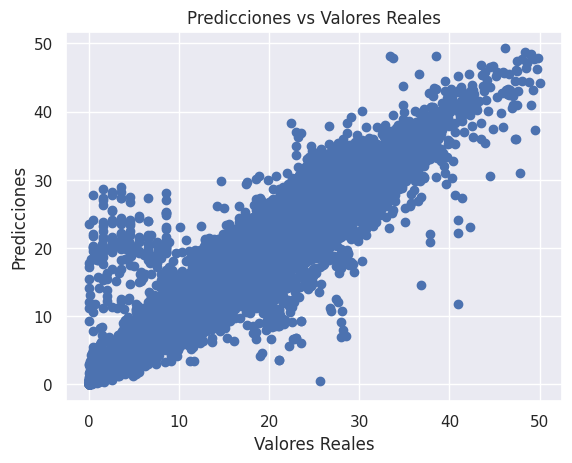

In [8]:
#@title **codigo proyecto**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv('Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20240312 (2).csv')

# Convertir la columna 'FechaObservacion' a tipo datetime con inferencia de formato
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], infer_datetime_format=True, errors='coerce')

# Eliminar filas con fechas no convertidas
df = df.dropna(subset=['FechaObservacion'])

# Extraer características temporales de la fecha de observación
df['Año'] = df['FechaObservacion'].dt.year
df['Mes'] = df['FechaObservacion'].dt.month
df['Día'] = df['FechaObservacion'].dt.day
df['Hora'] = df['FechaObservacion'].dt.hour
df['Minuto'] = df['FechaObservacion'].dt.minute

# Seleccionar características relevantes
features = ['Año', 'Mes', 'Día', 'Hora', 'Minuto', 'Latitud', 'Longitud']
X = df[features]
y = df['ValorObservado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor (n_estimators=5, max_depth=100, random_state=21)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

# Graficar los resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()